[Powrót do zadania 2](./2_main.ipynb)

[Poprzednie: 2.3.](./2_3.ipynb)

## 2.4.

>**Polecenie:** Na podstawie symulacji pokaż, jak zmienia się stabilność stanu stacjonarnego $N^∗ = 0$ (z niestabilnego na stabilny), gdy $k$ przekracza $r$. Możesz posłużyć się obliczeniami analitycznymi.

Analiza liniowa w N*=0 (f'(0)=r-k):
k=0.70: f'(0)=0.30  ->  N*=0 jest niestabilny
k=0.90: f'(0)=0.10  ->  N*=0 jest niestabilny
k=1.00: f'(0)=0.00  ->  N*=0 jest na granicy (k=r)
k=1.10: f'(0)=-0.10  ->  N*=0 jest stabilny
k=1.30: f'(0)=-0.30  ->  N*=0 jest stabilny


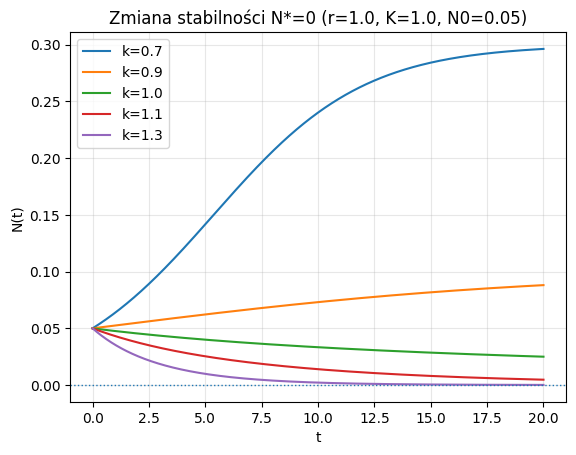

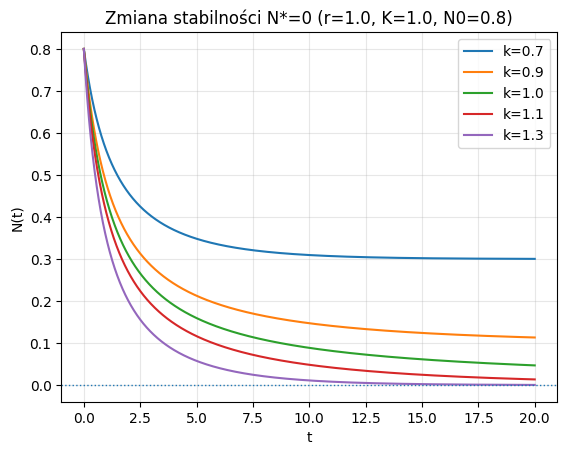

In [ ]:
# (2.4) Zmiana stabilności N*=0, gdy k przekracza r
# dN/dt = r*N*(1 - N/K) - k*N

import numpy as np
import matplotlib.pyplot as plt

def rhs(N, r, K, k):
    return r*N*(1 - N/K) - k*N

def euler(N0, r, K, k, t0=0.0, t_end=30.0, dt=0.01):
    steps = int(np.ceil((t_end - t0) / dt))
    t = np.linspace(t0, t0 + steps*dt, steps + 1)
    N = np.empty(steps + 1); N[0] = N0
    for n in range(steps):
        N[n+1] = N[n] + dt * rhs(N[n], r, K, k)
        if N[n+1] < 0: N[n+1] = 0.0
    return t, N

# Parametry
r, K = 1.0, 1.0
k_list = [0.7, 0.9, 1.0, 1.1, 1.3]  # k<r, k≈r, k>r
N0s = [0.05, 0.8]                   # dwa różne warunki początkowe

# Wydruk analityczny: znak f'(0) = r - k
print("Analiza liniowa w N*=0 (f'(0)=r-k):")
for k in k_list:
    lam = r - k
    stab = "niestabilny" if lam > 0 else ("stabilny" if lam < 0 else "na granicy (k=r)")
    print(f"k={k:.2f}: f'(0)={lam:.2f}  ->  N*=0 jest {stab}")

# Symulacje: trajektorie dla różnych k
for N0 in N0s:
    plt.figure()
    for k in k_list:
        t, N = euler(N0=N0, r=r, K=K, k=k, t0=0.0, t_end=20.0, dt=0.01)
        plt.plot(t, N, label=f"k={k}")
    plt.axhline(0, ls=":", lw=1)
    plt.xlabel("t"); plt.ylabel("N(t)")
    plt.title(f"Zmiana stabilności N*=0 (r={r}, K={K}, N0={N0})")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()



[Następne: 2.5.](./2_5.ipynb)